# Problem Statement : Home Loan Default
Building a model to predict how capable each applicant is of repaying a loan, so that sanctioning loan only for the applicants who are likely to repay the loan.

# Domain Analysis
1.application_train: The main training data with information about each loan application at Home Credit.The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid. Here we will use only the Training data.
2.bureau: In this dataset it consists of data concerning client’s previous credits from other financial institutions.one loan in the application data can have multiple previous credits.
3.bureau_balance: It consists of monthly data about the previous credits in bureau.single previous credit can have multiple rows, one for each month of the credit length.
4.previous_application:The data of previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
5.POS_CASH_BALANCE: It consists of monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
6.credit_card_balance:The monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
7.installments_payment:The data of payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the application_train.csv File

In [2]:
App_Train = pd.read_csv('G:\\Datamites\\Capstone Projects\\1006\\application_train.csv')

In [3]:
App_Train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
App_Train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
App_Train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [6]:
App_Train.shape

(307511, 122)

In [7]:
App_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
App_Train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
App_Train.describe(include = 'O')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [10]:
App_Train.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [11]:
App_Train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [12]:
App_Train.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [13]:
App_Train.duplicated().sum()

0

# EDA Process for Application_train.CSV File

In [14]:
App_Train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [15]:
App_Train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [16]:
pip install matplotlib

# Univariate Analysis

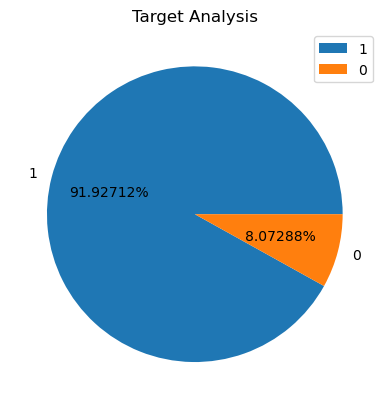

In [17]:
import matplotlib.pyplot as plt
plt.pie(App_Train['TARGET'].value_counts(),labels=App_Train['TARGET'].unique(),autopct='%0.5f%%')
plt.legend()
plt.title('Target Analysis')
plt.show()

The Target data is imbalanced because 91.9% repayed the loans and 8% not repayed

In [18]:
App_Train['AMT_INCOME_TOTAL'].unique()

array([202500. , 270000. ,  67500. , ...,  96768. , 546250.5, 113062.5])

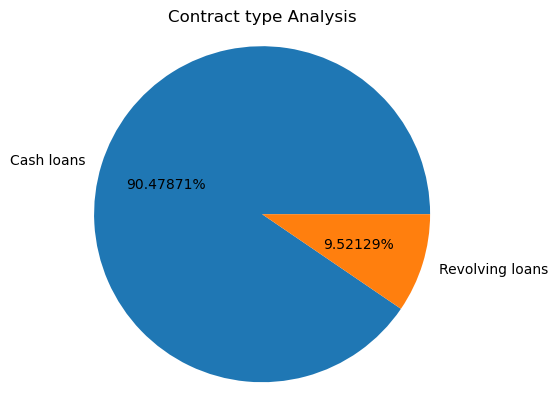

In [19]:
contract = App_Train['NAME_CONTRACT_TYPE'].value_counts()
plt.pie(contract,labels=App_Train['NAME_CONTRACT_TYPE'].unique(),autopct='%1.5f%%')
plt.axis('equal')
plt.title('Contract type Analysis')
plt.show()

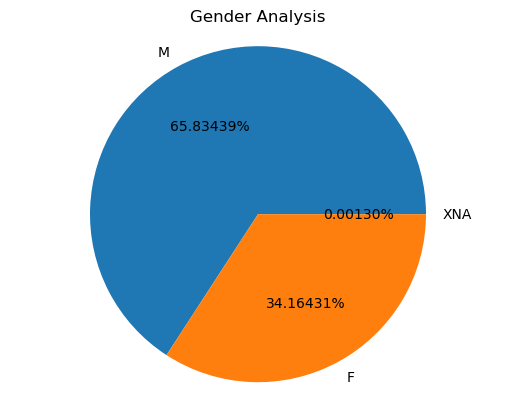

In [20]:
gender = App_Train['CODE_GENDER'].value_counts()
plt.pie(gender,labels=App_Train['CODE_GENDER'].unique(),autopct='%1.5f%%')
plt.axis('equal')
plt.title('Gender Analysis')
plt.show()

In Gender Column we have to do data cleaning for XNA

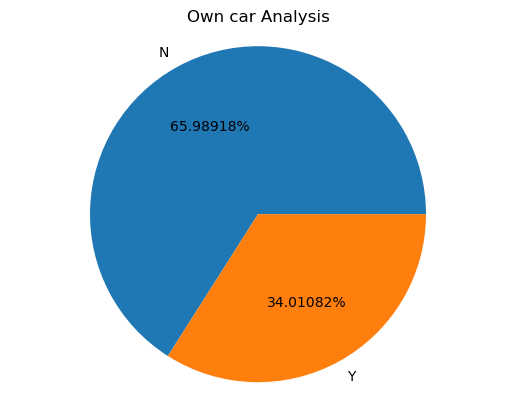

In [21]:
owncar = App_Train['FLAG_OWN_CAR'].value_counts()
plt.pie(owncar,labels=App_Train['FLAG_OWN_CAR'].unique(),autopct='%1.5f%%')
plt.axis('equal')
plt.title('Own car Analysis')
plt.show()

# Bivariate Analysis
Here we take Target Column in Y-axis, remaining columns in x-axis to analyze the two variables

In [22]:
App_Train['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

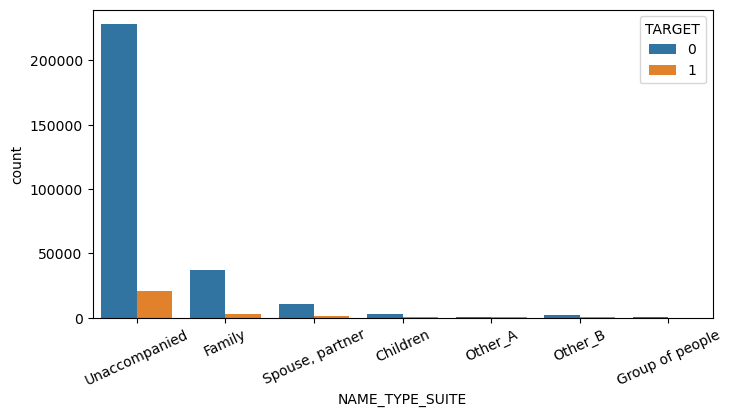

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_TYPE_SUITE',data=App_Train,hue='TARGET')
plt.xticks(rotation=25)
plt.show()

In [24]:
App_Train['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

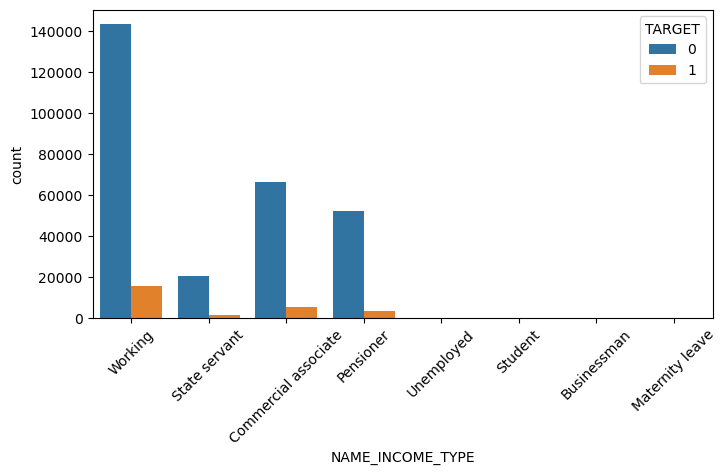

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_INCOME_TYPE',data=App_Train,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

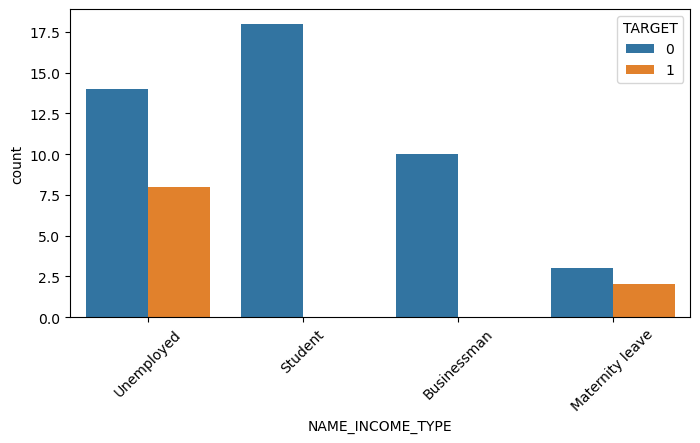

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_INCOME_TYPE',data=App_Train[App_Train['NAME_INCOME_TYPE'].isin(['Unemployed','Student', 'Businessman','Maternity leave'])],hue='TARGET')
plt.xticks(rotation=45)
plt.show()

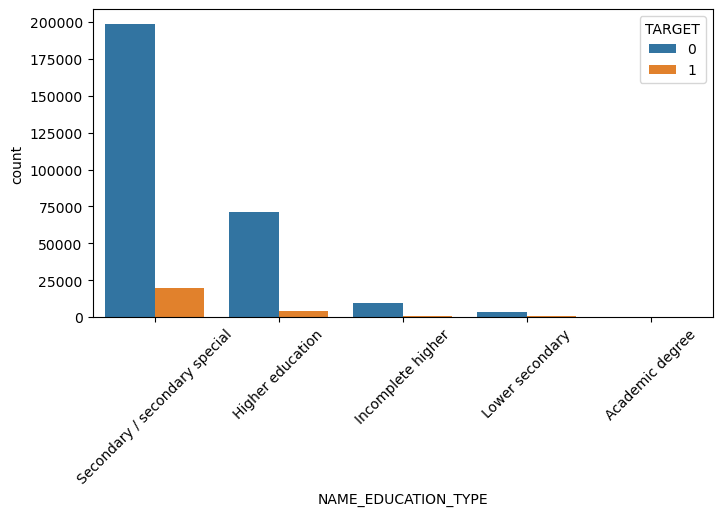

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_EDUCATION_TYPE',data=App_Train,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

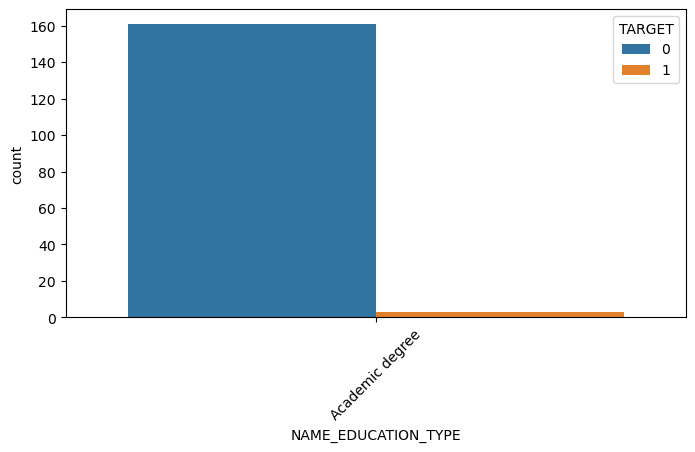

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_EDUCATION_TYPE',data=App_Train[App_Train['NAME_EDUCATION_TYPE'].isin(['Academic degree'])],hue='TARGET')
plt.xticks(rotation=45)
plt.show()

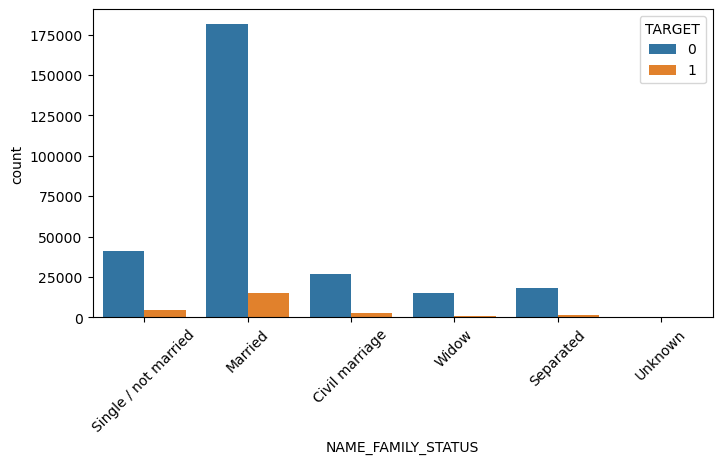

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_FAMILY_STATUS',data=App_Train,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

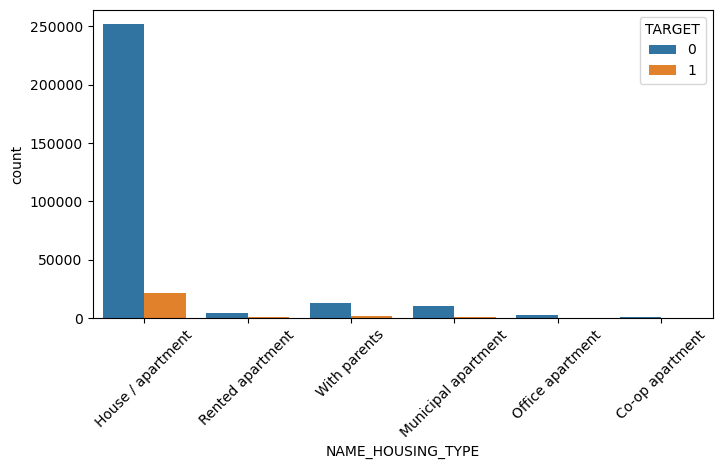

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_HOUSING_TYPE',data=App_Train,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

In [31]:
App_Train['AMT_INCOME_TOTAL'].unique()

array([202500. , 270000. ,  67500. , ...,  96768. , 546250.5, 113062.5])

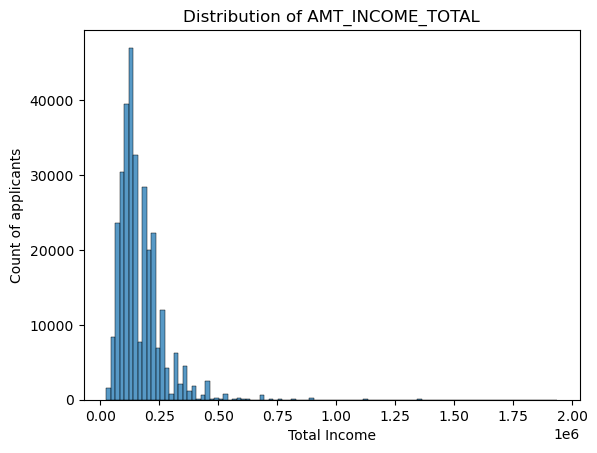

In [32]:
import seaborn as sns
filtered_data = App_Train[App_Train['AMT_INCOME_TOTAL'] < 2000000]
sns.histplot(data=filtered_data, x='AMT_INCOME_TOTAL', bins=100)
plt.xlabel('Total Income')
plt.ylabel('Count of applicants')
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.show()

Data is Right Side Skewed

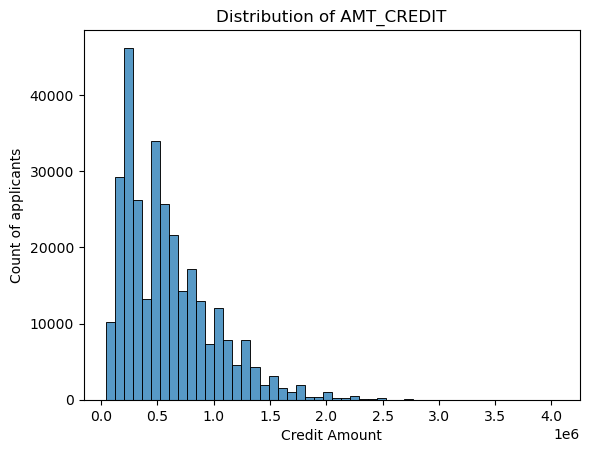

In [33]:
sns.histplot(App_Train['AMT_CREDIT'], bins=50)
plt.xlabel('Credit Amount')
plt.ylabel('Count of applicants')
plt.title('Distribution of AMT_CREDIT')
plt.show()

It is a right skewed so we go for log transformation to convert normal distribution

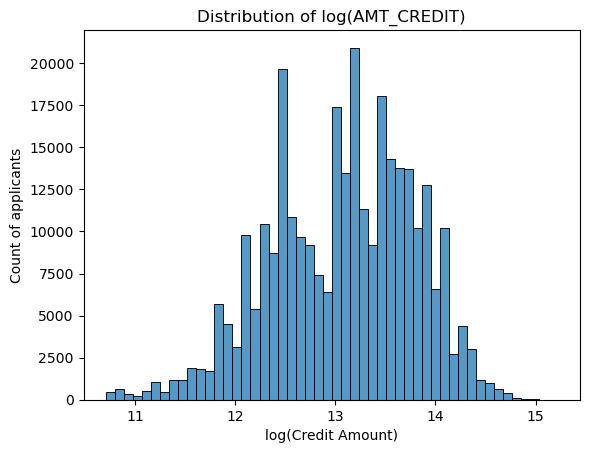

In [34]:
import numpy as np
sns.histplot(np.log(App_Train['AMT_CREDIT']), bins=50)
plt.xlabel('log(Credit Amount)')
plt.ylabel('Count of applicants')
plt.title('Distribution of log(AMT_CREDIT)')
plt.show()

In [35]:
App_Train['DAYS_BIRTH']/-365

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: DAYS_BIRTH, Length: 307511, dtype: float64

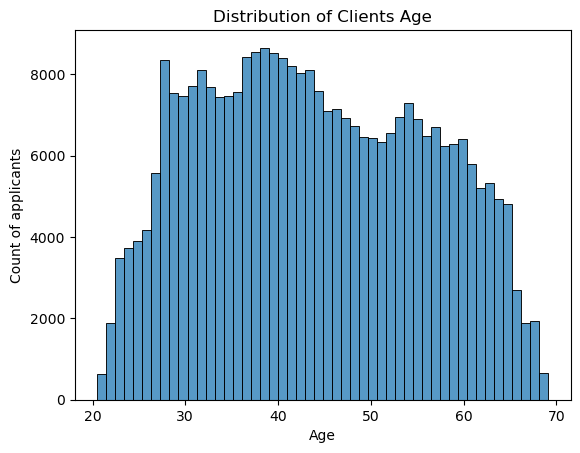

In [36]:
sns.histplot(App_Train['DAYS_BIRTH']/-365,bins=50)
plt.xlabel('Age')
plt.ylabel('Count of applicants')
plt.title('Distribution of Clients Age')
plt.show()

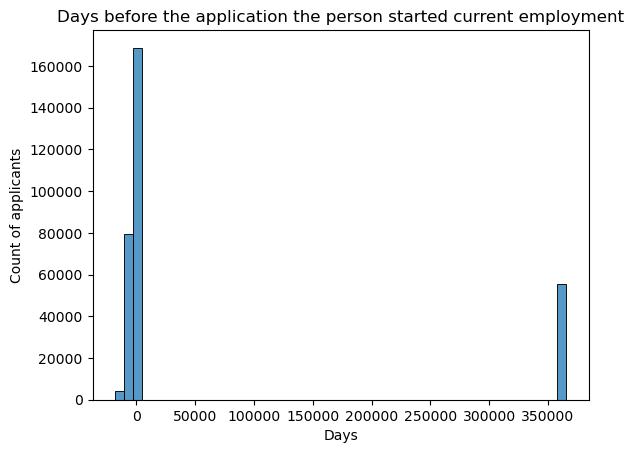

In [37]:
sns.histplot(App_Train['DAYS_EMPLOYED'], bins=50)
plt.xlabel('Days')
plt.ylabel('Count of applicants')
plt.title('Days before the application the person started current employment')
plt.show()

350k days is an outlier


In [38]:
App_Train[App_Train['DAYS_EMPLOYED'] == 365243]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0


In [39]:
App_Train['DAYS_EMPLOYED_ERROR'] = App_Train["DAYS_EMPLOYED"] == 365243
App_Train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

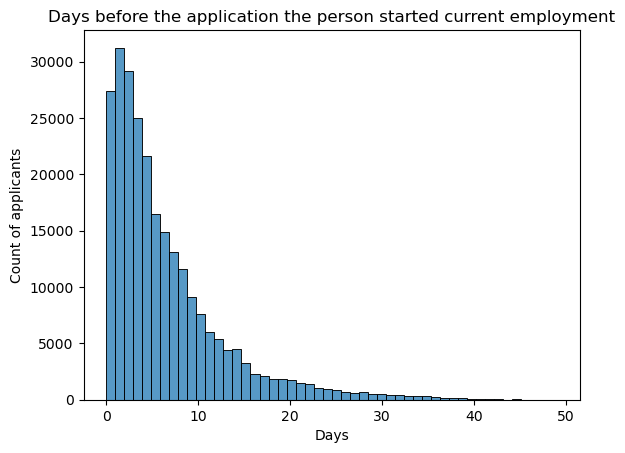

In [40]:
sns.histplot(App_Train['DAYS_EMPLOYED']/-365, bins=50)
plt.xlabel('Days')
plt.ylabel('Count of applicants')
plt.title('Days before the application the person started current employment')
plt.show()

# Data Preparation

In [41]:
App_Train['INCOME_GT_CREDIT_FLAG'] = App_Train['AMT_INCOME_TOTAL'] > App_Train['AMT_CREDIT']
App_Train['CREDIT_INCOME_PERCENT'] = App_Train['AMT_CREDIT'] / App_Train['AMT_INCOME_TOTAL']
App_Train['ANNUITY_INCOME_PERCENT'] = App_Train['AMT_ANNUITY'] / App_Train['AMT_INCOME_TOTAL']
App_Train['CREDIT_TERM'] = App_Train['AMT_CREDIT'] / App_Train['AMT_ANNUITY']
App_Train['DAYS_EMPLOYED_PERCENT'] = App_Train['DAYS_EMPLOYED'] / App_Train['DAYS_BIRTH']
print("The shape of application data:",App_Train.shape)

The shape of application data: (307511, 128)


Open the bureau and buraeu_balance file

In [42]:
bureau = pd.read_csv('G:/Datamites/Capstone Projects/1006/bureau.csv')
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,138615,6745057,Closed,currency 1,-1523,0,-1342.0,-1369.0,NaN,0,26301.96,0.0,NaN,0.0,Consumer credit,-800,NaN
1048571,369065,6745058,Closed,currency 1,-1650,0,-918.0,-918.0,NaN,0,127399.50,0.0,0.0,0.0,Consumer credit,-864,NaN
1048572,369065,6745059,Active,currency 1,-195,0,1419.0,NaN,NaN,0,639000.00,594391.5,0.0,0.0,Consumer credit,-6,0.0
1048573,369065,6745060,Closed,currency 1,-379,0,-6.0,-282.0,0.0,0,67500.00,0.0,0.0,0.0,Consumer credit,-282,19039.5


In [43]:
bureau_bal = pd.read_csv('G:/Datamites/Capstone Projects/1006/bureau_balance.csv')
bureau_bal

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [44]:
bureau_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [45]:
bureau_bal_numeric = bureau_bal.select_dtypes(include='number')
grp = bureau_bal_numeric.groupby('SK_ID_BUREAU').mean()
grp.reset_index(inplace=True)

In [46]:
grp.columns = ['BUREAU_BALANCE_'+column if column !='SK_ID_BUREAU' else column for column in grp.columns]
bureau = bureau.merge(grp, on='SK_ID_BUREAU', how='left')
bureau.update(bureau[grp.columns].fillna(0))

In [47]:
bureau_bal_categorical = pd.get_dummies(bureau_bal.select_dtypes('object'))
bureau_bal_categorical['SK_ID_BUREAU'] = bureau_bal['SK_ID_BUREAU']

In [48]:
grp = bureau_bal_categorical.groupby(by = ['SK_ID_BUREAU']).mean().reset_index()

In [49]:
grp.columns = ['BUREAU_BALANCE_'+column if column !='SK_ID_BUREAU' else column for column in grp.columns]
bureau = bureau.merge(grp, on='SK_ID_BUREAU', how='left')
bureau.update(bureau[grp.columns].fillna(0))

In [50]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,AMT_ANNUITY,BUREAU_BALANCE_MONTHS_BALANCE,BUREAU_BALANCE_STATUS_0,BUREAU_BALANCE_STATUS_1,BUREAU_BALANCE_STATUS_2,BUREAU_BALANCE_STATUS_3,BUREAU_BALANCE_STATUS_4,BUREAU_BALANCE_STATUS_5,BUREAU_BALANCE_STATUS_C,BUREAU_BALANCE_STATUS_X
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,NaN,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,NaN,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,NaN,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,NaN,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,NaN,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,138615,6745057,Closed,currency 1,-1523,0,-1342.0,-1369.0,NaN,0,...,NaN,-33.5,0.264706,0.000000,0.0,0.0,0.0,0.0,0.705882,0.029412
1048571,369065,6745058,Closed,currency 1,-1650,0,-918.0,-918.0,NaN,0,...,NaN,-47.5,0.214286,0.000000,0.0,0.0,0.0,0.0,0.785714,0.000000
1048572,369065,6745059,Active,currency 1,-195,0,1419.0,NaN,NaN,0,...,0.0,-3.0,0.857143,0.142857,0.0,0.0,0.0,0.0,0.000000,0.000000
1048573,369065,6745060,Closed,currency 1,-379,0,-6.0,-282.0,0.0,0,...,19039.5,-8.5,0.625000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.375000


In [51]:
# Joining Bureau data to Application data
# Select numerical columns
bureau_numeric = bureau.select_dtypes(include='number')

# Group by 'SK_ID_CURR' and calculate the mean for each numerical feature
grp = bureau_numeric.drop(['SK_ID_BUREAU'], axis = 1).groupby('SK_ID_CURR').mean()

# Reset index
grp.reset_index(inplace=True)


In [52]:
grp.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp.columns]
application_bureau = App_Train.merge(grp, on='SK_ID_CURR', how='left')
application_bureau.update(application_bureau[grp.columns].fillna(0))

In [53]:
bureau_categorical = pd.get_dummies(bureau.select_dtypes('object'))
bureau_categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']

In [54]:
grp = bureau_categorical.groupby(by = ['SK_ID_CURR']).mean().reset_index()

In [55]:
grp.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp.columns]
application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')
application_bureau.update(application_bureau[grp.columns].fillna(0))

In [56]:
application_bureau.shape

(307511, 172)

In [57]:
application_bureau

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,BUREAU_CREDIT_TYPE_Interbank credit,BUREAU_CREDIT_TYPE_Loan for business development,BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending),BUREAU_CREDIT_TYPE_Loan for the purchase of equipment,BUREAU_CREDIT_TYPE_Loan for working capital replenishment,BUREAU_CREDIT_TYPE_Microloan,BUREAU_CREDIT_TYPE_Mobile operator loan,BUREAU_CREDIT_TYPE_Mortgage,BUREAU_CREDIT_TYPE_Real estate loan,BUREAU_CREDIT_TYPE_Unknown type of loan
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
grp = bureau.groupby(by = ['SK_ID_CURR'])['SK_ID_BUREAU'].count().reset_index().rename(columns = {'SK_ID_BUREAU': 'BUREAU_LOAN_COUNT'})
application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')

In [59]:
application_bureau['BUREAU_LOAN_COUNT'] = application_bureau['BUREAU_LOAN_COUNT'].fillna(0)

In [60]:
# Number of types of past loans per customer
grp = bureau[['SK_ID_CURR', 'CREDIT_TYPE']].groupby(by = ['SK_ID_CURR'])['CREDIT_TYPE'].nunique().reset_index().rename(columns={'CREDIT_TYPE': 'BUREAU_LOAN_TYPES'})
application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')

In [61]:
application_bureau['BUREAU_LOAN_TYPES'] = application_bureau['BUREAU_LOAN_TYPES'].fillna(0)

In [62]:
# Debt over credit ratio
bureau['AMT_CREDIT_SUM'] = bureau['AMT_CREDIT_SUM'].fillna(0)
bureau['AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)

In [63]:
grp1 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM': 'TOTAL_CREDIT_SUM'})

In [64]:
grp2 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_DEBT']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_DEBT':'TOTAL_CREDIT_SUM_DEBT'})

In [65]:
grp1['DEBT_CREDIT_RATIO'] = grp2['TOTAL_CREDIT_SUM_DEBT']/grp1['TOTAL_CREDIT_SUM']
del grp1['TOTAL_CREDIT_SUM']

In [66]:
application_bureau = application_bureau.merge(grp1, on='SK_ID_CURR', how='left')

In [67]:
application_bureau['DEBT_CREDIT_RATIO'] = application_bureau['DEBT_CREDIT_RATIO'].fillna(0)
application_bureau['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], 0, inplace=True)
application_bureau['DEBT_CREDIT_RATIO'] = pd.to_numeric(application_bureau['DEBT_CREDIT_RATIO'], downcast='float')

In [68]:
# Overdue over debt ratio
bureau['AMT_CREDIT_SUM_OVERDUE'] = bureau['AMT_CREDIT_SUM_OVERDUE'].fillna(0)
bureau['AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)

In [69]:
grp1 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_OVERDUE']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_OVERDUE'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_OVERDUE': 'TOTAL_CUSTOMER_OVERDUE'})
grp2 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_DEBT']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_DEBT':'TOTAL_CUSTOMER_DEBT'})

In [70]:
grp1['OVERDUE_DEBT_RATIO'] = grp1['TOTAL_CUSTOMER_OVERDUE']/grp2['TOTAL_CUSTOMER_DEBT']
del grp1['TOTAL_CUSTOMER_OVERDUE']

In [71]:
application_bureau = application_bureau.merge(grp1, on='SK_ID_CURR', how='left')

In [72]:
application_bureau['OVERDUE_DEBT_RATIO'] = application_bureau['OVERDUE_DEBT_RATIO'].fillna(0)
application_bureau.replace([np.inf, -np.inf], 0,inplace=True)

In [73]:
application_bureau['OVERDUE_DEBT_RATIO'] = pd.to_numeric(application_bureau['OVERDUE_DEBT_RATIO'], downcast='float')

# Using Previous Application Data

In [74]:
previous_applicaton = pd.read_csv('G:/Datamites/Capstone Projects/1006/previous_application.csv')

In [75]:
previous_applicaton

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


Joining Previous Application data with Application Bureau data

In [76]:
# Number of previous applications per customer
grp = previous_applicaton[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].count().reset_index().rename(columns={'SK_ID_PREV':'PREV_APP_COUNT'})
application_bureau_prev = application_bureau.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_prev['PREV_APP_COUNT'] = application_bureau_prev['PREV_APP_COUNT'].fillna(0)

In [77]:
# Select numerical columns
prev_numeric = previous_applicaton.select_dtypes(include='number')

# Group by 'SK_ID_CURR' and calculate the mean for each numerical feature
grp = prev_numeric.drop(['SK_ID_PREV'], axis = 1).groupby('SK_ID_CURR').mean()

# Reset index
grp.reset_index(inplace=True)

In [78]:
# Combining categorical features
prev_categorical = pd.get_dummies(previous_applicaton.select_dtypes('object'))
prev_categorical['SK_ID_CURR'] = previous_applicaton['SK_ID_CURR']
prev_categorical.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,...,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,SK_ID_CURR
0,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,271877
1,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,108129
2,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,122040
3,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,176158
4,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,202054


In [79]:
grp = prev_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]

In [80]:
application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

# Using POS_CASH_balance data:

In [81]:
pos_cash = pd.read_csv('G:/Datamites/Capstone Projects/1006/POS_CASH_balance.csv')

In [82]:
pos_cash

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


Joining POS_CASH_balance data to application_bureau_prev_data:

In [83]:
# Combining numerical features
# Select numerical columns
pos_numeric = pos_cash.select_dtypes(include='number')

# Group by 'SK_ID_CURR' and calculate the mean for each numerical feature
grp = pos_numeric.drop(['SK_ID_PREV'], axis = 1).groupby('SK_ID_CURR').mean()

# Reset index
grp.reset_index(inplace=True)


In [84]:
prev_columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]

In [85]:
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')

In [86]:
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

In [87]:
# Combining categorical features
pos_cash_categorical = pd.get_dummies(pos_cash.select_dtypes('object'))
pos_cash_categorical['SK_ID_CURR'] = pos_cash['SK_ID_CURR']

In [88]:
grp = pos_cash_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['POS_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]

In [89]:
application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

# Using installments_payments data:

In [90]:
insta_payments = pd.read_csv('G:/Datamites/Capstone Projects/1006/installments_payments.csv')

In [91]:
insta_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [92]:
insta_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


combining with main data

In [93]:
# Combining numerical features and there are no categorical features in this dataset
grp = insta_payments.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()

In [94]:
prev_columns = ['INSTA_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]

In [95]:
grp.columns = prev_columns

In [96]:
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')

In [97]:
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

# Using Credit card balance data:

In [98]:
credit_card = pd.read_csv('G:/Datamites/Capstone Projects/1006/credit_card_balance.csv')

In [99]:
credit_card

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [100]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

combining with main data

In [101]:
# Select numerical columns
credit_numeric = credit_card.select_dtypes(include='number')

# Group by 'SK_ID_CURR' and calculate the mean for each numerical feature
grp = credit_numeric.drop(['SK_ID_PREV'], axis = 1).groupby('SK_ID_CURR').mean()

# Reset index
grp.reset_index(inplace=True)


In [102]:
prev_columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]

In [103]:
grp.columns = prev_columns
application_bureau_prev = application_bureau_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')

In [104]:
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

In [105]:
# Combining categorical features
credit_categorical = pd.get_dummies(credit_card.select_dtypes('object'))
credit_categorical['SK_ID_CURR'] = credit_card['SK_ID_CURR']

In [106]:
grp = credit_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]

In [107]:
application_bureau_prev = application_bureau_prev.merge(grp, on=['SK_ID_CURR'], how='left')
application_bureau_prev.update(application_bureau_prev[grp.columns].fillna(0))

In [108]:
application_bureau_prev.shape

(307511, 367)

In [109]:
application_bureau_prev

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CREDIT_CNT_INSTALMENT_MATURE_CUM,CREDIT_SK_DPD,CREDIT_SK_DPD_DEF,CREDIT_NAME_CONTRACT_STATUS_Active,CREDIT_NAME_CONTRACT_STATUS_Approved,CREDIT_NAME_CONTRACT_STATUS_Completed,CREDIT_NAME_CONTRACT_STATUS_Demand,CREDIT_NAME_CONTRACT_STATUS_Refused,CREDIT_NAME_CONTRACT_STATUS_Sent proposal,CREDIT_NAME_CONTRACT_STATUS_Signed
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
application_bureau_prev

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CREDIT_CNT_INSTALMENT_MATURE_CUM,CREDIT_SK_DPD,CREDIT_SK_DPD_DEF,CREDIT_NAME_CONTRACT_STATUS_Active,CREDIT_NAME_CONTRACT_STATUS_Approved,CREDIT_NAME_CONTRACT_STATUS_Completed,CREDIT_NAME_CONTRACT_STATUS_Demand,CREDIT_NAME_CONTRACT_STATUS_Refused,CREDIT_NAME_CONTRACT_STATUS_Sent proposal,CREDIT_NAME_CONTRACT_STATUS_Signed
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Dividing the data for model creation

In [111]:
X=application_bureau_prev.drop(['TARGET','SK_ID_CURR'],axis=1)
y=application_bureau_prev['TARGET']

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y)

In [113]:
X_train.shape

(230633, 365)

In [114]:
X_test.shape

(76878, 365)

In [115]:
# Seperation of columns into numeric and categorical columns
types = np.array([dt for dt in X_train.dtypes])

In [116]:
types

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('float64'), dtype('int64'), dtype('float64'),
       dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('O'), dtype('float64'), dtype('int64'),
       dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('O'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float6

In [117]:
all_columns = X_train.columns.values
is_num = types != 'object'

In [118]:
num_cols = all_columns[is_num]
cat_cols = all_columns[~is_num]

In [119]:
from sklearn.impute import SimpleImputer
# Featurization of numeric data
imputer_num = SimpleImputer(strategy='median')
X_train_num = imputer_num.fit_transform(X_train[num_cols])
X_test_num = imputer_num.transform(X_test[num_cols])

In [120]:
from sklearn.preprocessing import StandardScaler

scaler_num = StandardScaler()
X_train_num1 = scaler_num.fit_transform(X_train_num)
X_test_num1 = scaler_num.transform(X_test_num)

In [121]:
X_train_num_final = pd.DataFrame(X_train_num1, columns=num_cols)
X_test_num_final = pd.DataFrame(X_test_num1, columns=num_cols)

In [122]:
# Featurization of categorical data
imputer_cat = SimpleImputer(strategy='constant', fill_value='MISSING')
X_train_cat = imputer_cat.fit_transform(X_train[cat_cols])
X_test_cat = imputer_cat.transform(X_test[cat_cols])

In [123]:
X_train_cat1= pd.DataFrame(X_train_cat, columns=cat_cols)
X_test_cat1= pd.DataFrame(X_test_cat, columns=cat_cols)

In [124]:
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_cat2 = ohe.fit_transform(X_train_cat1)
X_test_cat2 = ohe.transform(X_test_cat1)

In [125]:
cat_cols_ohe = ohe.get_feature_names_out(input_features=cat_cols)

In [126]:
X_train_cat_final = pd.DataFrame(X_train_cat2, columns = cat_cols_ohe)
X_test_cat_final = pd.DataFrame(X_test_cat2, columns = cat_cols_ohe)

In [127]:
# Final complete data
X_train_final = pd.concat([X_train_num_final,X_train_cat_final], axis = 1)
X_test_final = pd.concat([X_test_num_final,X_test_cat_final], axis = 1)

In [128]:
print(X_train_final.shape)
print(X_test_final.shape)

(230633, 495)
(76878, 495)


In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
# Instantiate and train the logistic regression model (m1)
m1 = LogisticRegression()
m1.fit(X_train_final, y_train)

# Predict probabilities on the test set for logistic regression (m1)
y_pred_proba_m1 = m1.predict_proba(X_test_final)[:, 1]

# Calculate ROC-AUC score for logistic regression (m1)
roc_auc_m1 = roc_auc_score(y_test, y_pred_proba_m1)

print("Logistic Regression (m1) ROC-AUC Score:", roc_auc_m1)

Logistic Regression (m1) ROC-AUC Score: 0.7654798543348068


In [130]:
# Predict probabilities on the train set for logistic regression (m1)
y_train_pred_proba_m1 = m1.predict_proba(X_train_final)[:, 1]

# Calculate train ROC-AUC score for logistic regression (m1)
train_roc_auc_m1 = roc_auc_score(y_train, y_train_pred_proba_m1)
print("Train ROC-AUC score for logistic regression (m1):", train_roc_auc_m1)

Train ROC-AUC score for logistic regression (m1): 0.7694407667743257


In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Instantiate and train the decision tree model (m2)
m2 = DecisionTreeClassifier()
m2.fit(X_train_final, y_train)

# Predict probabilities on the test set for decision tree (m2)
y_pred_proba_m2 = m2.predict_proba(X_test_final)[:, 1]

# Calculate ROC-AUC score for decision tree (m2)
roc_auc_m2 = roc_auc_score(y_test, y_pred_proba_m2)

print("Decision Tree (m2) ROC-AUC Score:", roc_auc_m2)

Decision Tree (m2) ROC-AUC Score: 0.5407641587584838


In [132]:
# Predict probabilities on the train set for decision tree (m2)
y_train_pred_proba_m2 = m2.predict_proba(X_train_final)[:, 1]

# Calculate train ROC-AUC score for decision tree (m2)
train_roc_auc_m2 = roc_auc_score(y_train, y_train_pred_proba_m2)

# Print train ROC-AUC score for decision tree (m2)
print("Train ROC-AUC score for Decision Tree (m2):", train_roc_auc_m2)

Train ROC-AUC score for Decision Tree (m2): 1.0


In [133]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Instantiate and train the Gradient Boosting model (m3)
m3 = GradientBoostingClassifier()
m3.fit(X_train_final, y_train)

# Predict probabilities on the test set for Gradient Boosting (m3)
y_pred_proba_m3 = m3.predict_proba(X_test_final)[:, 1]

# Calculate ROC-AUC score for Gradient Boosting (m3)
roc_auc_m3 = roc_auc_score(y_test, y_pred_proba_m3)

print("Gradient Boosting (m3) ROC-AUC Score:", roc_auc_m3)

Gradient Boosting (m3) ROC-AUC Score: 0.7700426282897115


In [134]:
# Predict probabilities on the train set for Gradient Boosting (m3)
y_train_pred_proba_m3 = m3.predict_proba(X_train_final)[:, 1]

# Calculate train ROC-AUC score for Gradient Boosting (m3)
train_roc_auc_m3 = roc_auc_score(y_train, y_train_pred_proba_m3)

# Print train ROC-AUC score for Gradient Boosting (m3)
print("Train ROC-AUC score for Gradient Boosting (m3):", train_roc_auc_m3)

Train ROC-AUC score for Gradient Boosting (m3): 0.7766517653125036


In [135]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the Random Forest model (m4)
m4 = RandomForestClassifier()
m4.fit(X_train_final, y_train)

# Predict probabilities on the test set for Random Forest (m4)
y_pred_proba_m4 = m4.predict_proba(X_test_final)[:, 1]

# Calculate ROC-AUC score for Random Forest (m4)
roc_auc_m4 = roc_auc_score(y_test, y_pred_proba_m4)

print("Random Forest (m4) ROC-AUC Score:", roc_auc_m4)

Random Forest (m4) ROC-AUC Score: 0.7249006699717517


In [136]:
# Predict probabilities on the train set for Random Forest (m4)
y_train_pred_proba_m4 = m4.predict_proba(X_train_final)[:, 1]

# Calculate train ROC-AUC score for Random Forest (m4)
train_roc_auc_m4 = roc_auc_score(y_train, y_train_pred_proba_m4)

# Print train ROC-AUC score for Random Forest (m4)
print("Train ROC-AUC score for Random Forest (m4):", train_roc_auc_m4)

Train ROC-AUC score for Random Forest (m4): 1.0


In [137]:
!pip install xgboost

In [138]:
import xgboost as xgb

# Instantiate and train the XGBoost model (m5)
m5 = xgb.XGBClassifier()
m5.fit(X_train_final, y_train)

# Predict probabilities on the test set for XGBoost (m5)
y_pred_proba_m5 = m5.predict_proba(X_test_final)[:, 1]

# Calculate ROC-AUC score for XGBoost (m5)
roc_auc_m5 = roc_auc_score(y_test, y_pred_proba_m5)

print("XGBoost (m5) ROC-AUC Score:", roc_auc_m5)

XGBoost (m5) ROC-AUC Score: 0.7699282083289951


In [139]:
# Predict probabilities on the train set for XGBoost (m5)
y_train_pred_proba_m5 = m5.predict_proba(X_train_final)[:, 1]

# Calculate train ROC-AUC score for XGBoost (m5)
train_roc_auc_m5 = roc_auc_score(y_train, y_train_pred_proba_m5)

# Print train ROC-AUC score for XGBoost (m5)
print("Train ROC-AUC score for XGBoost (m5):", train_roc_auc_m5)


Train ROC-AUC score for XGBoost (m5): 0.8842103329043478


In [140]:
from sklearn.naive_bayes import GaussianNB

# Instantiate and train the Naive Bayes model (m6)
m6 = GaussianNB()
m6.fit(X_train_final, y_train)

# Predict probabilities on the test set for Naive Bayes (m6)
y_pred_proba_m6 = m6.predict_proba(X_test_final)[:, 1]

# Calculate ROC-AUC score for Naive Bayes (m6)
roc_auc_m6 = roc_auc_score(y_test, y_pred_proba_m6)

print("Naive Bayes (m6) ROC-AUC Score:", roc_auc_m6)

Naive Bayes (m6) ROC-AUC Score: 0.5116625526386313


In [141]:
# Predict probabilities on the train set for Naive Bayes (m6)
y_train_pred_proba_m6 = m6.predict_proba(X_train_final)[:, 1]

# Calculate train ROC-AUC score for Naive Bayes (m6)
train_roc_auc_m6 = roc_auc_score(y_train, y_train_pred_proba_m6)

# Print train ROC-AUC score for Naive Bayes (m6)
print("Train ROC-AUC score for Naive Bayes (m6):", train_roc_auc_m6)


Train ROC-AUC score for Naive Bayes (m6): 0.5138160477748159


# Model Evaluation

In [142]:
import pandas as pd

df = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'Decision Trees', 'Gradient Boosting', 'Random Forest', 'XGBoost', 'GaussianNB'],
    'Train_AUC_score': [train_roc_auc_m1, train_roc_auc_m2, train_roc_auc_m3, train_roc_auc_m4, train_roc_auc_m5, train_roc_auc_m6],
    'Test_AUC_score': [roc_auc_m1, roc_auc_m2, roc_auc_m3, roc_auc_m4, roc_auc_m5, roc_auc_m6]
})

df.sort_values(by='Test_AUC_score', ascending=False,ignore_index=True)

,Algorithm,Train_AUC_score,Test_AUC_score
0,Gradient Boosting,0.776652,0.770043
1,XGBoost,0.884210,0.769928
2,Logistic Regression,0.769441,0.765480
3,Random Forest,1.000000,0.724901
4,Decision Trees,1.000000,0.540764
5,GaussianNB,0.513816,0.511663


# Conclusion

. Gradient Boosting model performs the best as it has the best Test_AUC_score.
. We can conclude m3 has the best model.